# 강남구 음주운전 관련 데이터 분석

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
%matplotlib inline

import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
d1 = pd.read_csv('전국무인교통단속카메라표준데이터.csv', encoding = 'cp949')
d2 = pd.read_csv('졸음운전 교통사고 현황(2017).csv', encoding = 'cp949')
d3 = pd.read_csv('도로교통공단_시도_시군구별_도로형태별_교통사고(2018).csv', encoding = 'cp949')
d4 = pd.read_csv('도로교통공단_시도_시군구별_시간대별_교통사고(2018).csv', encoding = 'cp949')
d5 = pd.read_excel('서울시 교통사고 현황 (사고유형별) 통계.xlsx', encoding = 'cp949')

### 단속 카메라 표준 데이터

In [3]:
d1.head(3)

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,...,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치년도,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명
0,주정차050,9,광주시,99,중로 3-11,문화로,3.0,경기도 광주시 경안동 47-54,경기도 광주시 경안동 47-54,37.409622,...,0,NaN,NaN,NaN,2018.0,경기도 광주시청,031-760-2112,2020-03-26,5540000,경기도 광주시
1,주정차049,9,광주시,99,소로 2-14,경충대로,3.0,경기도 광주시 초월읍 쌍동리 186-1,경기도 광주시 초월읍 쌍동리 186-1,37.371034,...,30,NaN,NaN,2.0,2018.0,경기도 광주시청,031-760-2112,2020-03-26,5540000,경기도 광주시
2,주정차048,9,광주시,99,중로 2-28,양촌길,3.0,경기도 광주시 오포읍 양벌리 1040-15,경기도 광주시 오포읍 양벌리 1040-15,37.370517,...,0,NaN,NaN,NaN,2018.0,경기도 광주시청,031-760-2112,2020-03-26,5540000,경기도 광주시


In [4]:
addr = d1[d1.소재지지번주소.str.contains('서울특별시') == 1].시군구명.unique()

In [5]:
addr

array(['서초구', '종로구', '금천구', '서대문구', '은평구', '성북구', '광진구', '강동구', '서울시',
       '동대문구'], dtype=object)

In [6]:
camera = d1.query('시군구명 in @addr').iloc[:, [2,9,10]]

In [7]:
display(camera.head(3))

,시군구명,위도,경도
30,은평구,37.588513,126.914053
342,강동구,37.539782,127.124188
343,강동구,37.537963,127.123787


In [8]:
camera.at[6642, '시군구명'] = '서초구'

In [9]:
ssg_camera = camera.시군구명.value_counts().reset_index()
ssg_camera.columns = ['시군구명', '카메라수']
ssg_camera

,시군구명,카메라수
0,서초구,282
1,종로구,131
2,서대문구,97
3,은평구,85
4,동대문구,66
5,성북구,65
6,강동구,55
7,금천구,48
8,광진구,39


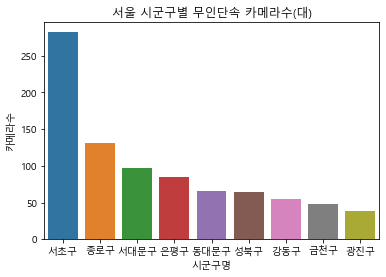

In [10]:
sns.barplot(ssg_camera.시군구명, ssg_camera.카메라수)
plt.title('서울 시군구별 무인단속 카메라수(대)')
plt.show()

In [11]:
ssg_camera.to_csv("카메라_구별수.csv", index = False, encoding = 'cp949')

### 졸음운전 교통사고 현황

In [12]:
d2.head()

,구분,사고(건),사망(명),부상(명)
0,2014년1월,169,7,347
1,2014년2월,145,3,268
2,2014년3월,206,12,358
3,2014년4월,182,4,360
4,2014년5월,218,17,474


In [13]:
d2['발생년도'] = d2.구분.str[:4] + '년'

In [14]:
d2['년월'] = d2.구분.apply(lambda x : re.sub('[가-힣]+', '', x))

In [15]:
def ym(x):
    if len(x) == 5:
        t = x[:4] + '0' + x[-1]
        return t
    else:
        return x

In [16]:
d2.년월 = d2.년월.apply(ym)

In [17]:
d2['발생월'] = d2.년월.str[-2:]

In [18]:
d2 = d2.set_index(d2.년월)

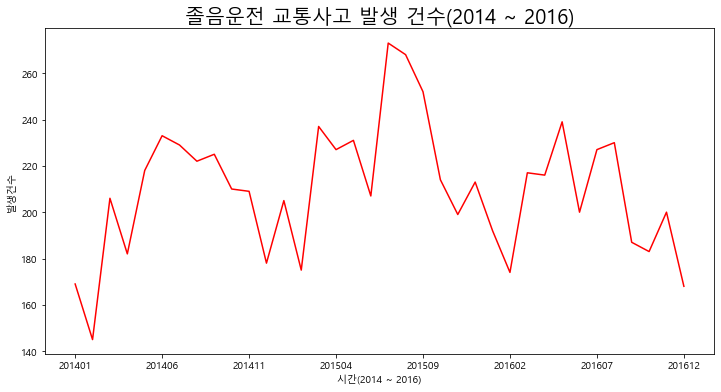

In [19]:
plt.figure(figsize = (12,6))
d2['사고(건)'].plot(color = 'r')
plt.xlabel('시간(2014 ~ 2016)')
plt.ylabel('발생건수')
plt.title('졸음운전 교통사고 발생 건수(2014 ~ 2016)', size = 20)
plt.show()

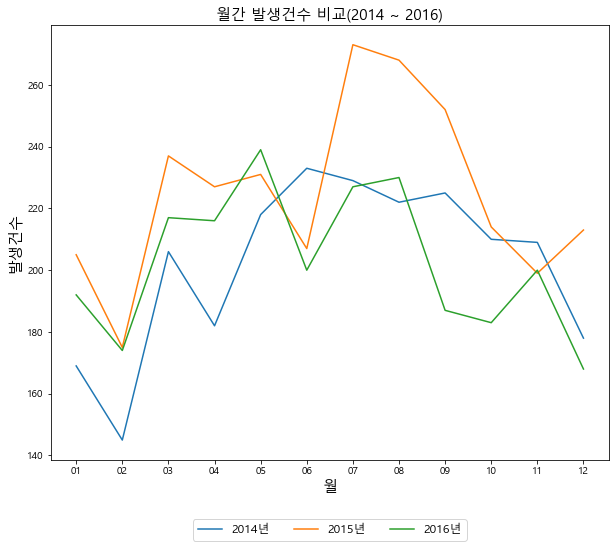

In [20]:
plt.figure(figsize = (10,8))
sns.lineplot(x = d2.발생월, y = d2['사고(건)'], hue = d2.발생년도)
plt.xlabel('월', size = 15)
plt.ylabel('발생건수', size = 15)
plt.title('월간 발생건수 비교(2014 ~ 2016)', size = 15)
plt.legend(d2.발생년도.unique(), fontsize = 12, loc="lower center", bbox_to_anchor=(0.5, -.2), ncol = 3)
plt.show()

### 도로교통공단_시도_시군구별_도로형태별_교통사고(2018)

In [21]:
d3 = d3.loc[d3.시도 == '서울']

In [22]:
d3.head()

,시도,시군구,도로형태,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,종로구,터널안,8,1,12,0,10,2
1,서울,종로구,교량위,3,0,5,1,4,0
2,서울,종로구,지하차도(도로)내,41,0,56,12,38,6
3,서울,종로구,기타단일로,644,4,863,175,566,122
4,서울,종로구,교차로내,235,1,333,75,226,32


In [23]:
cr_acd = pd.crosstab(d3.시군구, d3.도로형태, aggfunc = sum, values = d3.발생건수).fillna(0)
cr_acd.index.name = None
cr_acd.columns.name = None
cr_acd.head()

,고가도로위,교량위,교차로내,교차로부근,교차로횡단보도내,기타,기타단일로,불명,주차장,지하차도(도로)내,터널안
강남구,4.0,20.0,607.0,667.0,78.0,247.0,1809.0,0.0,15.0,7.0,5.0
강동구,1.0,24.0,375.0,250.0,63.0,124.0,545.0,0.0,5.0,30.0,1.0
강북구,0.0,0.0,390.0,162.0,46.0,33.0,582.0,0.0,2.0,0.0,1.0
강서구,1.0,4.0,373.0,267.0,76.0,51.0,717.0,0.0,6.0,1.0,6.0
관악구,0.0,1.0,304.0,209.0,39.0,54.0,676.0,1.0,2.0,0.0,14.0


### 도로교통공단_시도_시군구별_시간대별_교통사고(2018)

In [24]:
d4 = d4.loc[d4.시도 == '서울']
d4.head(3)

,시도,시군구,시간대,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,종로구,00시-02시,76,1,114,23,83,8
1,서울,종로구,02시-04시,40,0,60,11,45,4
2,서울,종로구,04시-06시,43,0,58,13,37,8


In [25]:
cr_time_acd = pd.crosstab(d4.시간대, d4.시군구, aggfunc = sum, values = d4.발생건수).fillna(0)
cr_time_acd.index.name = None
cr_time_acd.columns.name = None
cr_time_acd.head()

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
00시-02시,299,70,80,95,113,104,99,70,106,30,...,71,97,170,86,163,93,86,76,64,86
02시-04시,213,57,74,67,78,51,53,41,55,30,...,54,70,111,45,101,71,53,40,57,39
04시-06시,164,51,61,82,56,34,71,39,75,25,...,57,53,95,60,97,65,32,43,51,75
06시-08시,169,81,64,96,76,64,90,62,91,42,...,66,64,166,102,134,81,78,64,60,73
08시-10시,296,134,99,145,109,107,132,78,141,84,...,109,144,261,128,260,123,108,94,92,135


In [26]:
time_top = pd.DataFrame({'시간대' : [], 'top1' : [], 'top2' : [], 'top3' : []})

In [27]:
for v in cr_time_acd.T.columns:
    top_df = pd.DataFrame({v : cr_time_acd.T[v].nlargest(3).index}, index = time_top.columns[1:]).T
    time_top = time_top.append(top_df.reset_index().rename(columns={"index": '시간대'}))

In [28]:
time_top

,시간대,top1,top2,top3
0,00시-02시,강남구,송파구,영등포구
0,02시-04시,강남구,송파구,영등포구
0,04시-06시,강남구,서초구,영등포구
0,06시-08시,강남구,송파구,서초구
0,08시-10시,강남구,송파구,영등포구
0,10시-12시,강남구,서초구,송파구
0,12시-14시,강남구,송파구,서초구
0,14시-16시,강남구,송파구,영등포구
0,16시-18시,송파구,강남구,서초구
0,18시-20시,강남구,송파구,영등포구


In [29]:
cr_time_acd['서울평균'] = cr_time_acd.mean(axis = 1)

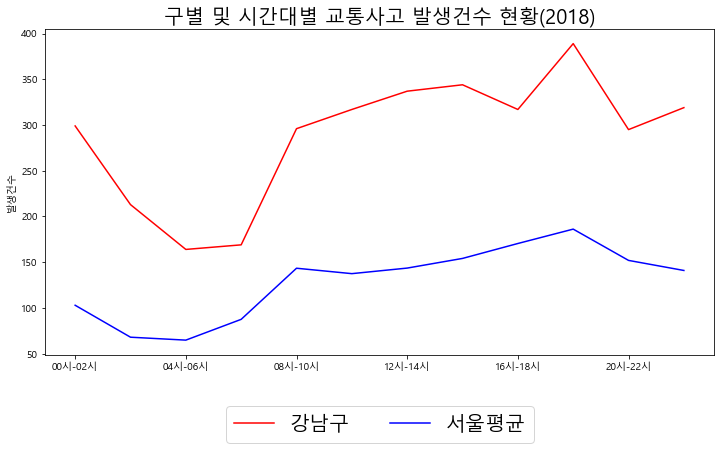

In [30]:
plt.rcParams["figure.figsize"] = (12, 6)
cr_time_acd[['강남구','서울평균']].plot(color = ['r','b'])
plt.title('구별 및 시간대별 교통사고 발생건수 현황(2018)', size = 20)
plt.ylabel('발생건수', size = 10)
plt.legend(['강남구', '서울평균'],fontsize = 20, loc="lower center", bbox_to_anchor=(0.5, -.3), ncol = 2)
plt.show()

### 서울시 교통사고 현황 (사고유형별) 통계

In [31]:
d5.columns = d5.iloc[0,:]
d5 = d5.iloc[1:, :]

d5.차대차 = [0 if x == '-' else x for x in d5.차대차]
d5.차량단독 = [0 if x == '-' else x for x in d5.차량단독]

In [32]:
d5.head()

,기간,자치구,구분,합계,차대사람,차대차,차량단독
1,2019,합계,발생건수,39258,9896,28150,1212
2,2019,합계,사망자수,250,139,84,27
3,2019,합계,부상자수,53904,10320,42181,1403
4,2019,종로구,발생건수,1133,305,781,47
5,2019,종로구,사망자수,6,3,3,0


#### 발생건수

In [33]:
d5_occ = d5.loc[(d5.구분 == '발생건수') & (d5.자치구 != '합계')]
d5_occ.head()

,기간,자치구,구분,합계,차대사람,차대차,차량단독
4,2019,종로구,발생건수,1133,305,781,47
7,2019,중구,발생건수,1184,284,862,38
10,2019,용산구,발생건수,1187,259,896,32
13,2019,성동구,발생건수,1091,225,831,35
16,2019,광진구,발생건수,973,260,682,31


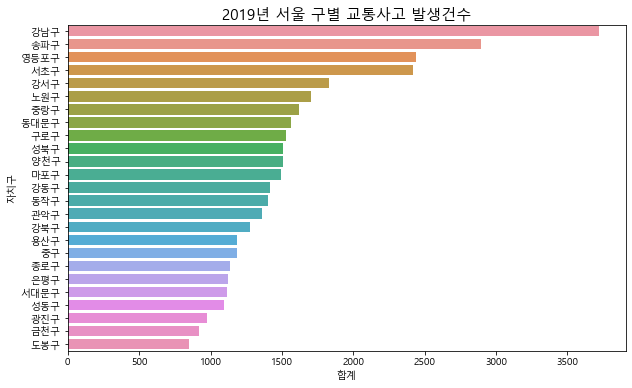

In [34]:
plt.figure(figsize = (10,6))
sns.barplot(x = d5_occ.합계, y = d5_occ.sort_values(by = '합계', ascending = 0).자치구)
plt.title('2019년 서울 구별 교통사고 발생건수', size = 15)
plt.show()

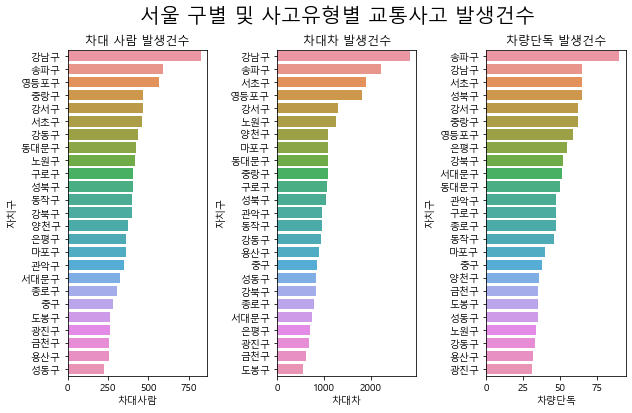

In [36]:
fig, ax = plt.subplots(1,3, figsize = (10,6), gridspec_kw = {'wspace':.5, 'hspace':0})
sns.barplot(y = d5_occ.sort_values(by = '차대사람', ascending = 0).자치구, x = d5_occ.차대사람, ax = ax[0])
ax[0].set_title('차대 사람 발생건수')
sns.barplot(y = d5_occ.sort_values(by = '차대차', ascending = 0).자치구, x = d5_occ.차대차, ax = ax[1])
ax[1].set_title('차대차 발생건수')
sns.barplot(y = d5_occ.sort_values(by = '차량단독', ascending = 0).자치구, x = d5_occ.차량단독, ax = ax[2])
ax[2].set_title('차량단독 발생건수')
fig.suptitle('서울 구별 및 사고유형별 교통사고 발생건수', size = 20)
plt.show()

#### 사망자수

In [155]:
d5_die = d5.loc[(d5.구분 == '사망자수') & (d5.자치구 != '합계')]
d5_die.head()

,기간,자치구,구분,합계,차대사람,차대차,차량단독
5,2019,종로구,사망자수,6,3,3,0
8,2019,중구,사망자수,5,4,1,0
11,2019,용산구,사망자수,10,6,1,3
14,2019,성동구,사망자수,13,8,2,3
17,2019,광진구,사망자수,3,3,0,0


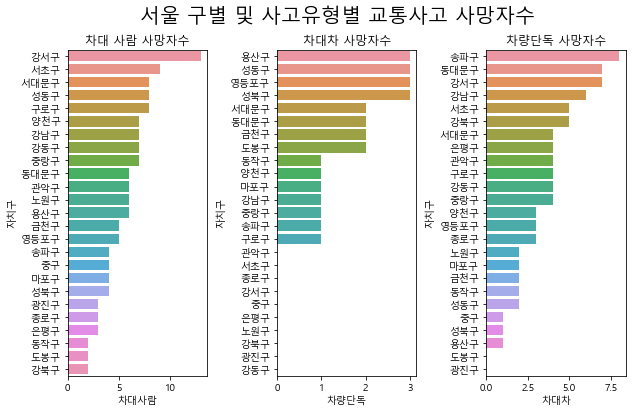

In [156]:
fig, ax = plt.subplots(1,3, figsize = (10,6), gridspec_kw = {'wspace':.5, 'hspace':0})
sns.barplot(y = d5_die.sort_values(by = '차대사람', ascending = 0).자치구, x = d5_die.차대사람, ax = ax[0])
ax[0].set_title('차대 사람 사망자수')
sns.barplot(y = d5_die.sort_values(by = '차대차', ascending = 0).자치구, x = d5_die.차대차, ax = ax[2])
ax[1].set_title('차대차 사망자수')
sns.barplot(y = d5_die.sort_values(by = '차량단독', ascending = 0).자치구, x = d5_die.차량단독, ax = ax[1])
ax[2].set_title('차량단독 사망자수')
fig.suptitle('서울 구별 및 사고유형별 교통사고 사망자수', size = 20)
plt.show()

#### 부상자수

In [157]:
d5_inj = d5.loc[(d5.구분 == '부상자수') & (d5.자치구 != '합계')]
d5_inj.head()

,기간,자치구,구분,합계,차대사람,차대차,차량단독
6,2019,종로구,부상자수,1559,319,1169,71
9,2019,중구,부상자수,1615,299,1277,39
12,2019,용산구,부상자수,1614,270,1311,33
15,2019,성동구,부상자수,1439,227,1173,39
18,2019,광진구,부상자수,1316,267,1015,34


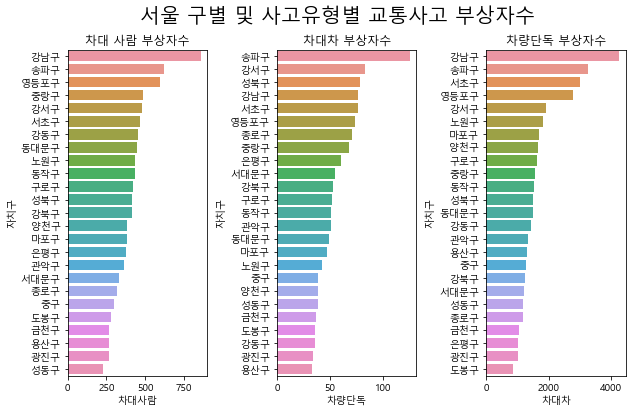

In [158]:
fig, ax = plt.subplots(1,3, figsize = (10,6), gridspec_kw = {'wspace':.5, 'hspace':0})
sns.barplot(y = d5_inj.sort_values(by = '차대사람', ascending = 0).자치구, x = d5_inj.차대사람, ax = ax[0])
ax[0].set_title('차대 사람 부상자수')
sns.barplot(y = d5_inj.sort_values(by = '차대차', ascending = 0).자치구, x = d5_inj.차대차, ax = ax[2])
ax[1].set_title('차대차 부상자수')
sns.barplot(y = d5_inj.sort_values(by = '차량단독', ascending = 0).자치구, x = d5_inj.차량단독, ax = ax[1])
ax[2].set_title('차량단독 부상자수')
fig.suptitle('서울 구별 및 사고유형별 교통사고 부상자수', size = 20)
plt.show()

### 서울시 강남구 단란주점 업소 현황

In [159]:
df = pd.read_csv('서울시 강남구 단란주점 식품위생업소 현황.csv', encoding = 'cp949')

In [160]:
df['행정동'] = df.소재지지번.str[10:13]

In [161]:
df.head(3)

,시군구코드,업종코드,년도,업소일련번호,업종명,허가신고일,업소명,소재지도로명,소재지지번,영업장면적(㎡),...,작업장면적(㎡),검사실면적(㎡),진열(판매)대면적(㎡),창고(보관소)면적(㎡),허가(신고)번호,조건부허가시작일,조건부허가종료일,내외국인구분,국적,행정동
0,3220000,103,1993,3971,단란주점,19931221,레드리본,서울특별시 강남구 압구정로79길 8 (청담동),서울특별시 강남구 청담동 119번지 8호,NaN,...,NaN,NaN,NaN,NaN,3220000-103-1993-03971,NaN,NaN,내국인,대한민국,청담동
1,3220000,103,1993,3964,단란주점,19931220,그레이스,서울특별시 강남구 도산대로 450 (청담동),서울특별시 강남구 청담동 5번지 9호,140.33,...,NaN,NaN,NaN,NaN,3220000-103-1993-03964,NaN,NaN,내국인,대한민국,청담동
2,3220000,103,1993,3964,단란주점,19931220,그레이스,서울특별시 강남구 도산대로 450 (청담동),서울특별시 강남구 청담동 5번지 9호,140.33,...,NaN,NaN,NaN,NaN,3220000-103-1993-03964,NaN,NaN,내국인,대한민국,청담동


In [162]:
행정동 = ['개포1동','개포2동','개포4동', '논현1동','논현2동','대치1동','대치2동','대치4동',
       '도곡1동','도곡2동','삼성1동','삼성2동','수서동','신사동','압구정동','역삼1동','역삼2동',
       '일원1동','일원2동','일원본동','청담동','세곡동']

In [163]:
유흥주점수 = [22,22,22,223,223,43,43,43,18,18,93,93,1,278,0,291,291,0,0,0,153,0]

In [164]:
gn_yh = pd.DataFrame({'행정동' : 행정동, '유흥주점수' : 유흥주점수})

In [165]:
gn_yh.head()

,행정동,유흥주점수
0,개포1동,22
1,개포2동,22
2,개포4동,22
3,논현1동,223
4,논현2동,223


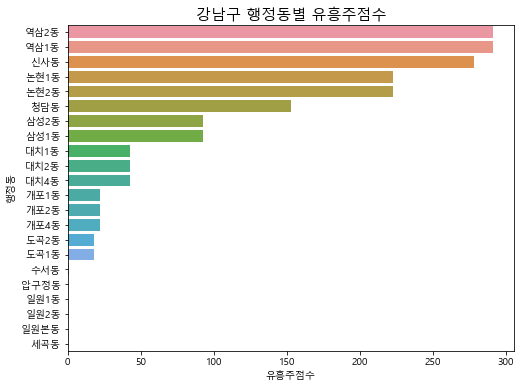

In [166]:
plt.figure(figsize = (8,6))
sns.barplot(x = gn_yh.유흥주점수, y = gn_yh.sort_values(by = '유흥주점수', ascending  = 0).행정동)
plt.title('강남구 행정동별 유흥주점수', size = 15)
plt.show()

In [199]:
gn_yh.to_csv("행정동_유흥주점.csv",index = False, encoding = 'cp949')

### 강남구 단란주점 업소 현황

In [333]:
dl = pd.read_csv('서울시 강남구 단란주점 식품위생업소 현황.csv', encoding = 'cp949')

In [340]:
dl['행정동'] = [x.split()[2] for x in dl.소재지지번]

In [342]:
dl.행정동.value_counts()

역삼동    582
논현동    447
신사동    278
삼성동    186
청담동    153
대치동    130
개포동     67
도곡동     36
수서동      1
Name: 행정동, dtype: int64

In [343]:
행정동 = ['개포1동','개포2동','개포4동', '논현1동','논현2동','대치1동','대치2동','대치4동',
'도곡1동','도곡2동','삼성1동','삼성2동','수서동','신사동','압구정동','역삼1동','역삼2동','일원1동','일원2동','일원본동','청담동','세곡동']

In [344]:
단란주점수 = [22,22,23,223,224,43,43,44,18,18,93,93,1, 278,0,291,291,0,0,0,153,0]

In [345]:
gn_dl = pd.DataFrame({'행정동' : 행정동, '단란주점수' : 단란주점수})

In [346]:
gn_dl.head()

,행정동,단란주점수
0,개포1동,22
1,개포2동,22
2,개포4동,23
3,논현1동,223
4,논현2동,224


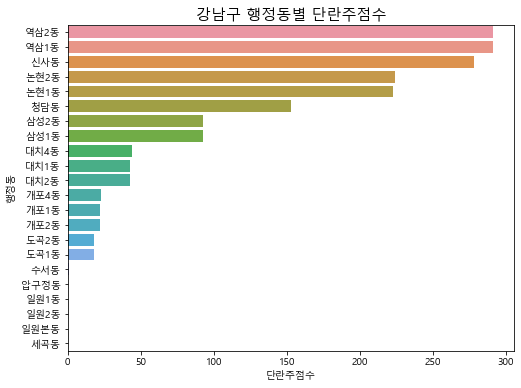

In [347]:
plt.figure(figsize = (8,6))
sns.barplot(x = gn_dl.단란주점수, y = gn_dl.sort_values(by = '단란주점수', ascending  = 0).행정동)
plt.title('강남구 행정동별 단란주점수', size = 15)
plt.show()

In [348]:
gn_dl.to_csv("행정동_단란주점.csv",index = False, encoding = 'cp949')

### 강남구 인구

In [176]:
인구 = pd.read_excel("서울시 강남구 주민등록인구(연령대,동별).xlsx", encoding = 'cp949')

In [177]:
인구 = 인구.loc[인구.자치구 == '강남구']

In [178]:
인구 = 인구.loc[인구.구분 == '계']

In [179]:
인구

,기간,자치구,동,구분,계,0~4세,5~9세,10~14세,15~19세,20~24세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상+
1143,2020.1/4,강남구,소계,계,549898,14971,23751,28543,31613,34275,...,36414,33059,25483,20091,13231,7510,3790,1723,494,280
1146,2020.1/4,강남구,신사동,계,17487,439,618,833,947,1093,...,1110,982,820,796,613,404,186,70,18,10
1149,2020.1/4,강남구,논현1동,계,23944,400,354,394,559,1568,...,1385,1338,1010,804,558,317,150,48,22,19
1152,2020.1/4,강남구,논현2동,계,21858,547,629,541,788,1342,...,1424,1253,994,879,613,291,169,61,27,20
1155,2020.1/4,강남구,삼성1동,계,14959,466,494,609,838,1034,...,1157,1050,749,603,426,214,87,52,14,6
1158,2020.1/4,강남구,삼성2동,계,30674,1008,1545,1822,1674,1767,...,1631,1364,1064,951,710,347,139,65,20,12
1161,2020.1/4,강남구,대치1동,계,25298,490,1660,2928,2679,1548,...,1377,1077,847,640,360,239,97,42,10,15
1164,2020.1/4,강남구,대치4동,계,20770,332,509,934,1635,1566,...,1300,918,619,590,437,191,92,29,6,10
1167,2020.1/4,강남구,역삼1동,계,36973,607,536,574,885,2396,...,2009,1795,1226,959,717,358,176,75,17,23
1170,2020.1/4,강남구,역삼2동,계,37513,1143,1993,2786,2728,2159,...,1710,1444,1159,1054,690,367,162,74,28,21


In [180]:
인구 = 인구.iloc[1:, 2:]

In [181]:
인구.loc[1210] = 인구.iloc[:,2:].sum(axis = 0)

In [182]:
인구.tail(3)

,동,구분,계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상+
1206,대치2동,계,38575.0,612,1468,2948,3686,2842,2343.0,1727,...,2879,2276,1750,1274,719,363,205,90,24,21
1209,개포2동,계,22510.0,739,949,1130,1536,1558,1447.0,1380,...,1856,1600,1313,820,397,221,126,62,11,9
1210,NaN,NaN,549898.0,14971,23751,28543,31613,34275,42563.0,41188,...,36414,33059,25483,20091,13231,7510,3790,1723,494,280


In [183]:
young = 인구.iloc[:, [3,4]].sum(axis = 1)
middle = 인구.iloc[:, [5,6]].sum(axis = 1)
old = 인구.iloc[:, 7:].sum(axis = 1)

In [184]:
인구['유소년'] = young
인구['청장년'] = middle
인구['노년'] = old

In [185]:
인구.tail()

,동,구분,계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,...,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상+,유소년,청장년,노년
1200,압구정동,계,27802.0,882,1396,1445,1453,1644,1663.0,1574,...,1381,1035,608,281,129,39,16,2278.0,2898.0,22626.0
1203,청담동,계,29479.0,1028,1372,1113,1372,1903,2328.0,2219,...,1158,719,423,187,104,38,24,2400.0,2485.0,24594.0
1206,대치2동,계,38575.0,612,1468,2948,3686,2842,2343.0,1727,...,1274,719,363,205,90,24,21,2080.0,6634.0,29861.0
1209,개포2동,계,22510.0,739,949,1130,1536,1558,1447.0,1380,...,820,397,221,126,62,11,9,1688.0,2666.0,18156.0
1210,NaN,NaN,549898.0,14971,23751,28543,31613,34275,42563.0,41188,...,20091,13231,7510,3790,1723,494,280,38722.0,60156.0,451020.0


In [186]:
인구.유소년 /= 38722
인구.청장년 /= 86664
인구.노년 /= 72602

In [187]:
인구 = 인구[['동', '유소년', '청장년', '노년']][:-1]

In [188]:
인구['인구지수'] = 인구.iloc[:, 1:].sum(axis = 1)

In [189]:
인구.columns = ['행정동', '유소년', '청장년', '노년', '인구지수']

In [190]:
인구.index = range(0,len(인구))

In [191]:
인구.sort_values(by = '인구지수', ascending = 0).head(5)

,행정동,유소년,청장년,노년,인구지수
17,세곡동,0.126027,0.052432,0.490840,0.669299
8,역삼2동,0.080988,0.063625,0.397551,0.542164
20,대치2동,0.053716,0.076549,0.411297,0.541562
7,역삼1동,0.029518,0.016835,0.473417,0.519770
10,도곡2동,0.078586,0.056021,0.366739,0.501346


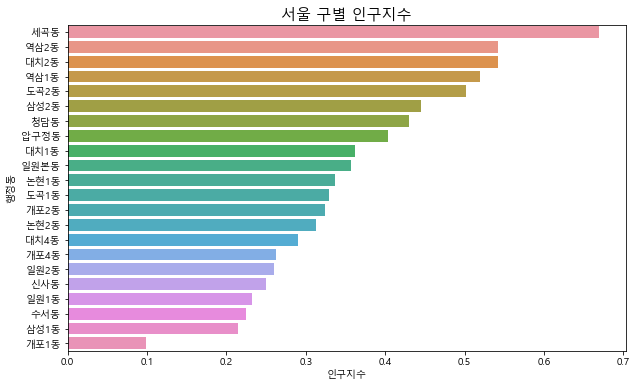

In [192]:
plt.figure(figsize = (10,6))
sns.barplot(x = 인구.인구지수, y = 인구.sort_values(by = '인구지수', ascending = 0).행정동)
plt.title('서울 구별 인구지수', size = 15)
plt.ylabel('행정동')
plt.show()

In [193]:
인구.to_csv("인구지수.csv", index = False, encoding = 'cp949')

### 교통약자

In [200]:
인구 = pd.read_excel("서울시 강남구 주민등록인구(연령대,동별).xlsx", encoding = 'cp949')

In [201]:
인구 = 인구.loc[인구.자치구 == '강남구']

In [202]:
인구 = 인구.loc[인구.구분 == '계']

In [203]:
인구

,기간,자치구,동,구분,계,0~4세,5~9세,10~14세,15~19세,20~24세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상+
1143,2020.1/4,강남구,소계,계,549898,14971,23751,28543,31613,34275,...,36414,33059,25483,20091,13231,7510,3790,1723,494,280
1146,2020.1/4,강남구,신사동,계,17487,439,618,833,947,1093,...,1110,982,820,796,613,404,186,70,18,10
1149,2020.1/4,강남구,논현1동,계,23944,400,354,394,559,1568,...,1385,1338,1010,804,558,317,150,48,22,19
1152,2020.1/4,강남구,논현2동,계,21858,547,629,541,788,1342,...,1424,1253,994,879,613,291,169,61,27,20
1155,2020.1/4,강남구,삼성1동,계,14959,466,494,609,838,1034,...,1157,1050,749,603,426,214,87,52,14,6
1158,2020.1/4,강남구,삼성2동,계,30674,1008,1545,1822,1674,1767,...,1631,1364,1064,951,710,347,139,65,20,12
1161,2020.1/4,강남구,대치1동,계,25298,490,1660,2928,2679,1548,...,1377,1077,847,640,360,239,97,42,10,15
1164,2020.1/4,강남구,대치4동,계,20770,332,509,934,1635,1566,...,1300,918,619,590,437,191,92,29,6,10
1167,2020.1/4,강남구,역삼1동,계,36973,607,536,574,885,2396,...,2009,1795,1226,959,717,358,176,75,17,23
1170,2020.1/4,강남구,역삼2동,계,37513,1143,1993,2786,2728,2159,...,1710,1444,1159,1054,690,367,162,74,28,21


In [204]:
인구 = 인구.iloc[1:, 2:]

In [205]:
인구.loc[1210] = 인구.iloc[:,2:].sum(axis = 0)

In [206]:
인구.tail(3)

,동,구분,계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상+
1206,대치2동,계,38575.0,612,1468,2948,3686,2842,2343.0,1727,...,2879,2276,1750,1274,719,363,205,90,24,21
1209,개포2동,계,22510.0,739,949,1130,1536,1558,1447.0,1380,...,1856,1600,1313,820,397,221,126,62,11,9
1210,NaN,NaN,549898.0,14971,23751,28543,31613,34275,42563.0,41188,...,36414,33059,25483,20091,13231,7510,3790,1723,494,280


### 음주운전 교통사고 정보

In [282]:
al_acd = pd.read_csv('al_acd.csv', encoding = 'cp949')

In [270]:
al_acd.head()

,시도,시군구,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1
0,시도,시군구,사고건수,사망자수,사고건수,사망자수,사고건수,사망자수,사고건수,사망자수,사고건수,사망자수
1,합계,합계,"26,260",583,"21,180",481,"20,795",439,"20,684",346,"16,621",295
2,서울,합계,"3,659",41,"3,031",41,"3,021",33,"3,019",27,"2,287",13
3,서울,종로구,70,0,81,0,73,0,70,0,49,0
4,서울,중구,63,0,57,0,39,0,71,1,34,0


In [271]:
al_acd2019 = al_acd[['시군구', '2019']].iloc[3:, :]

In [272]:
al_acd2019.to_csv('gn_alacd.csv', index = False, encoding = 'cp949')

In [326]:
sgg_acd_sum = al_acd.iloc[3:, [1, 2,4,6,8,10]]

In [327]:
sgg_acd_sum['사고건수총합'] = sgg_acd_sum.iloc[:, 1:].applymap(lambda x : int(x)).sum(axis = 1)
sgg_acd_sum

,시군구,2015,2016,2017,2018,2019,사고건수총합
3,종로구,70,81,73,70,49,343
4,중구,63,57,39,71,34,264
5,용산구,145,129,112,108,76,570
6,성동구,95,89,87,87,67,425
7,동대문구,149,107,97,101,66,520
8,성북구,105,112,86,90,65,458
9,도봉구,64,51,72,44,35,266
10,은평구,101,82,72,84,78,417
11,서대문구,75,78,57,59,36,305
12,마포구,207,184,195,167,123,876


In [328]:
sgg_acd_sum.to_csv('구별_음주운전교통사고발생건수.csv', index = False, encoding = 'cp949')